In [1]:
include("OQS_Tools_v1.jl")
using Plots
using ITensors
using ITensorMPS
using LinearAlgebra
using PolyChaos
using .OQS_Tools_v1
BLAS.set_num_threads(4)
ITensors.enable_threaded_blocksparse(false)

false

In [2]:
D = 1.0 #bandwidth
g = 0.2 #system-bath coupling
N = 50 #number of bath sites
beta = 10.0 #inverse temperature
mu = 0.3 #chemical potential
Es = 0.0 #system onsite energy
sys = N+1
sys_occ = 0.0 #system initial occupation
dt = 0.1 #time step
tmax = 10.0 #maximum time

10.0

In [3]:
J = create_spectral("elliptical", D, g)
J1, J2 = thermofield_transform(J, beta, mu)
E1, h1 = chain_map(J1, N, D)
E2, h2 = chain_map(J2, N, D)

([0.5571859273016763, 0.4884890562652006, 0.3452966725874798, 0.20054533147273246, 0.08750922316392969, 0.026322413728809266, 0.005332978957757948, 0.0007545791021953136, 7.864622367682632e-5, 6.317092957844365e-6  …  -2.0701398908940472e-10, -2.0702190888275993e-10, -2.070357229896251e-10, -2.070507735240896e-10, -2.070262213169127e-10, -2.0698103394493584e-10, -2.069350971733417e-10, -2.0692522411103135e-10, -2.069389898302086e-10, -2.0695097189468612e-10], [0.1416984058288341, 0.22789108870878877, 0.28972898253862145, 0.3640489796159096, 0.430675278944407, 0.47471932841041115, 0.49377853589912035, 0.4989542502980503, 0.49987384071936874, 0.49998851299955327  …  0.49999999865109945, 0.4999999986165524, 0.4999999985820091, 0.4999999985474716, 0.49999999851292515, 0.49999999847836296, 0.4999999984437964, 0.4999999984092417, 0.49999999837470643, 0.49999999834017916])

In [4]:
H_mat = make_H_matrix(E1, E2, h1, h2, Es, N)
C0 = prepare_correlations(N, sys_occ)

psi0, sites, states = prepare_MPS(N, sys_occ)
H_mpo = make_H_mpo(E1, E2, h1, h2, sites, Es, N, sys)

MPO
[1] ((dim=4|id=538|"Link,l=1") <Out>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=2|id=877|"Fermion,Site,n=1")' <Out>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1, (dim=2|id=877|"Fermion,Site,n=1") <In>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1)
[2] ((dim=4|id=538|"Link,l=1") <In>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=4|id=18|"Link,l=2") <Out>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=2|id=447|"Fermion,Site,n=2")' <Out>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1, (dim=2|id=447|"Fermion,Site,n=2") <In>
 1: QN("Nf",0,-1) => 1
 2: QN("Nf",1,-1) => 1)
[3] ((dim=4|id=18|"Link,l=2") <In>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=4|id=351|"Link,l=3") <Out>
 1: QN() => 1
 2: QN("Nf",1,-1) => 1
 3: QN("Nf",-1,-1) => 1
 4: QN("Nf",0,-1) => 1, (dim=2|id=68|"Fermion,Site,n=3")' <Out>
 1: QN("Nf",

timestep 1 of 100 complete
timestep 2 of 100 complete
timestep 3 of 100 complete
timestep 4 of 100 complete
timestep 5 of 100 complete
timestep 6 of 100 complete
timestep 7 of 100 complete
timestep 8 of 100 complete
timestep 9 of 100 complete
timestep 10 of 100 complete
timestep 11 of 100 complete
timestep 12 of 100 complete
timestep 13 of 100 complete
timestep 14 of 100 complete
timestep 15 of 100 complete
timestep 16 of 100 complete
timestep 17 of 100 complete
timestep 18 of 100 complete
timestep 19 of 100 complete
timestep 20 of 100 complete
timestep 21 of 100 complete
timestep 22 of 100 complete
timestep 23 of 100 complete
timestep 24 of 100 complete
timestep 25 of 100 complete
timestep 26 of 100 complete
timestep 27 of 100 complete
timestep 28 of 100 complete
timestep 29 of 100 complete
timestep 30 of 100 complete
timestep 31 of 100 complete
timestep 32 of 100 complete
timestep 33 of 100 complete
timestep 34 of 100 complete
timestep 35 of 100 complete
timestep 36 of 100 complete
t

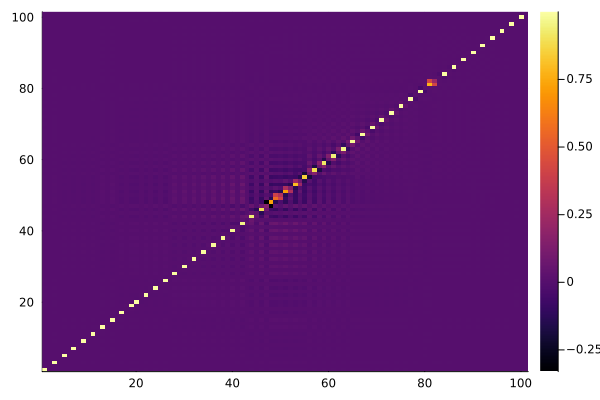

(ComplexF64[1.0000000000000018 + 1.6155871338926322e-27im 1.2116903504194741e-27 + 4.649058915617843e-16im … -7.007420655137181e-62 + 1.2849576355803791e-61im -1.2999959499187624e-62 - 6.973590125996407e-63im; -2.039678756539448e-26 - 4.3021142204224816e-16im 1.0000000000000093 + 8.077935669463161e-27im … -1.2458015344022086e-60 - 6.846678640832831e-61im 6.813554741798405e-62 - 1.2602741764173144e-61im; … ; -7.007420655137181e-62 - 1.2849576355803796e-61im -1.2458015344022086e-60 + 6.84667864083283e-61im … 1.14049404436043e-63 + 1.897595629781494e-80im 6.516191114348923e-67 + 1.1379406216760603e-64im; -1.2999959499187624e-62 + 6.973590125996403e-63im 6.813554741798403e-62 + 1.2602741764173139e-61im … 6.516191114348965e-67 - 1.13794062167606e-64im 1.1354325291783421e-65 + 2.0167143998255354e-82im], [0.00043567095631788386, 0.0017407129061463907, 0.003909230168757126, 0.006931453314254065, 0.010793823462888728, 0.015479108801692511, 0.020966551845889077, 0.02723204559383003, 0.0342483363

In [5]:
psi, nSys_mps = evolve_MPS(psi0, H_mpo, sys, dt, tmax)

C, nSys_exact = evolve_correlations(C0, H_mat, dt, tmax, N)

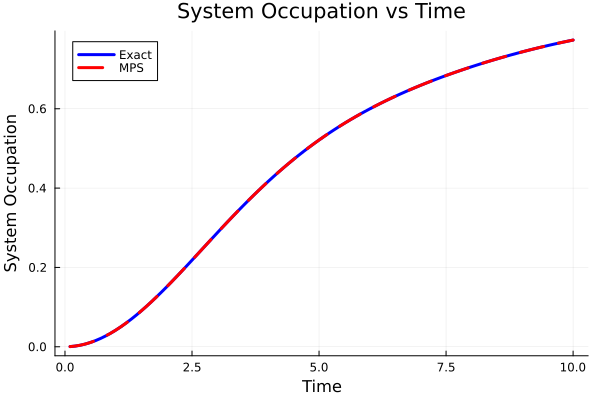

In [6]:
p1 = plot(collect(dt:dt:tmax), nSys_exact, label="Exact", xlabel="Time", ylabel="System Occupation", title="System Occupation vs Time", lw=3,c=:blue)
plot!(collect(dt:dt:tmax), nSys_mps, label="MPS", linestyle=:dash, lw=3,c=:red)

display(p1)